In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


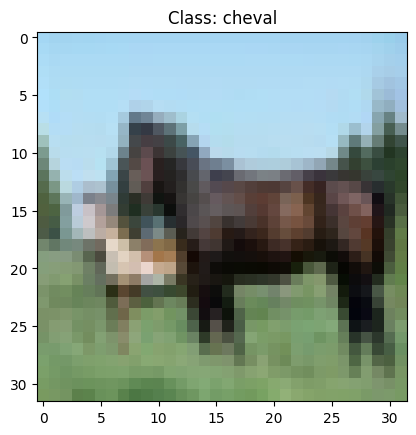

In [13]:
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']
plt.imshow(x_train[12])
plt.title(f'Class: {class_names[y_train[12][0]]}')
plt.show()

In [11]:
# Normalisation des données
x_train = x_train / 255
x_test = x_test / 255

In [12]:
from tensorflow.keras.utils import to_categorical
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 

In [26]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(patience=2, restore_best_weights=True)

# Model training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(
    x_train, y_cat_train,
    validation_data=(x_test, y_cat_test),
    epochs=20,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
1563/1563 [==============================] - 31s 19ms/step - loss: 1.3851 - accuracy: 0.5028 - val_loss: 1.1437 - val_accuracy: 0.5980
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0275 - accuracy: 0.6381 - val_loss: 0.9766 - val_accuracy: 0.6648
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8797 - accuracy: 0.6907 - val_loss: 0.9349 - val_accuracy: 0.6782
Epoch 4/15
 792/1563 [==============>...............] - ETA: 10s - loss: 0.7653 - accuracy: 0.7308

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_cat_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('my_model.h5')


In [ ]:
import random

# Select a random index from the test dataset
index = random.randint(0, len(x_test) - 1)

# Get the image and its corresponding label
image = x_test[index]
label = y_test[index][0]

# Reshape the image to match the input shape of the model
image = image.reshape(1, 32, 32, 3)

# Make the prediction using the trained model
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

# Get the class name for the true label and predicted label
true_class = class_names[label]
predicted_class = class_names[predicted_label]

# Display the image and the prediction result
plt.imshow(image.reshape(32, 32, 3))
plt.title(f'True Class: {true_class}\nPredicted Class: {predicted_class}')
plt.axis('off')
plt.show()
